In [1]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp as mt
from itertools import product

seqs = [''.join(c) for c in product('ATCG', repeat=8)]

rdict = {'A':'T', 'T':'A','C':'G', 'G':'C'}
def rc (seq):
    return "".join([rdict[c]for c in seq][::-1])

forwards = []
for s in seqs:
    if rc(s) in forwards:
        pass
    else:
        forwards.append(s)
len(forwards)
forwards = list(
    filter(
    lambda seq: 15.5 <= mt.Tm_NN(seq, Mg = 11.5, Na = 5, saltcorr=4) <= 16.5,
        forwards
    )
)
len(forwards)
#CG contents
forwards = [
    seq for seq in forwards
    if (seq.count("C") + seq.count("G")) / len(seq) == 0.5
]
len(forwards)

1227

In [ ]:
import random
from nupack import *
from tqdm import tqdm

model1 = Model(material='dna', celsius=16, sodium=0.05, magnesium=0.00)
max_unique_seq = []
max_len = 0


for r in tqdm(range(len(forwards))):
    unique_seq = []
    potential_seq = []
    if len(unique_seq) == 0:
        unique_seq.append(forwards[r])
        unique_seq.append(rc(forwards[r]))


    for r1 in range(len(forwards)):    
        count = 0
        for b, uni_seq in enumerate(unique_seq):
            if b % 2 ==0: #only want to loop the forward seq
                if r1 != r:
                    potential_seq.append(forwards[r1])

                    dG_comp_pot = pfunc((forwards[r1], rc(forwards[r1])), model=model1)

                    dG_pot_f_1 = pfunc((forwards[r1], uni_seq), model = model1) #compare dG from possible pair (forward) to the sequences inside unique_seq

                    dG_pot_f_2 = pfunc((forwards[r1], rc(uni_seq)), model = model1)

                    dG_pot_r_1 = pfunc((rc(forwards[r1]),uni_seq),model=model1) #compare dG from possible pair (reverse) to the sequences inside unique_seq

                    dG_pot_r_2 = pfunc((rc(forwards[r1]),rc(uni_seq)), model=model1)

                    dG_palindromic = pfunc((forwards[r1],forwards[r1]), model=model1)

                    ddG_pot_f_1 = dG_comp_pot[1] - dG_pot_f_1[1]
                    ddG_pot_f_2 = dG_comp_pot[1] - dG_pot_f_2[1]

                    ddG_pot_r_1 = dG_comp_pot[1] - dG_pot_r_1[1]
                    ddG_pot_r_2 = dG_comp_pot[1] - dG_pot_r_2[1]

                    ddG_palindromic = dG_comp_pot[1] - dG_palindromic[1]

                    if ddG_pot_f_1 <= -4.1 and ddG_pot_f_2 <= -4.1 and ddG_pot_r_1 <= -4.1 and ddG_pot_r_2 <= -4.1 and ddG_palindromic <= -4: #ddG_pal maybe bs
                        # print(ddG_pot_f_1,',',ddG_pot_f_2,',',ddG_pot_r_1,',',ddG_pot_r_2)
                        count += 2
                    # print(count)
                    if count == len(unique_seq): #why unique_seq cannot more than 4
                        # print(len(unique_seq))

                        count_1 = 0
                        for c, strand in enumerate(unique_seq):

                            if c % 2 ==0:
                                dG_comp_1 = pfunc((strand, rc(strand)), model=model1) #compare dG from the sequences inside unique_seq to the possible pair

                                dG_forw_1 = pfunc((strand,potential_seq[0]), model=model1) #check forward strand inside unique with forward and reverse in the possible pair
                                dG_forw_2 = pfunc((strand,rc(potential_seq[0])),model=model1)


                                dG_rev_1 = pfunc((rc(strand),potential_seq[0]), model=model1) #check reverse strand inside unique with forward and reverse in the possible pair
                                dG_rev_2 = pfunc((rc(strand),rc(forwards[r1])),model=model1)



                                ddG_forw_1 = dG_comp_1[1] - dG_forw_1[1]
                                ddG_forw_2 = dG_comp_1[1] - dG_forw_2[1]


                                ddG_rev_1 = dG_comp_1[1] - dG_rev_1[1]
                                ddG_rev_2 = dG_comp_1[1] - dG_rev_2[1]



                                if ddG_forw_1 <= -4.1 and ddG_forw_2 <= -4.1 and ddG_rev_1 <= -4.1 and ddG_rev_2 <= -4.1:
                                    # print(ddG_forw_1,',',ddG_forw_2,',',ddG_rev_1,',',ddG_rev_2)
                                    count_1 += 2   #why always = 2

                                if count_1 == len(unique_seq):

                                    unique_seq.append(potential_seq[0])
                                    unique_seq.append(rc(potential_seq[0]))


                    potential_seq = []


    if len(unique_seq) > max_len or len(unique_seq) >= 48:
        max_len = len(unique_seq)
        max_unique_seq = unique_seq[:]
        for i in range(0, len(max_unique_seq), 2):
            print(max_unique_seq[i])
            print(max_unique_seq[i+1])
        print(len(max_unique_seq))  

  0%|                                              | 1/1227 [01:10<24:01:16, 70.54s/it]

AAAAGCCC
GGGCTTTT
AAATCGGG
CCCGATTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGGACG
CGTCCTTT
AATCCACG
CGTGGATT
AATGCTGG
CCAGCATT
AATGGTCG
CGACCATT
AACTAGCG
CGCTAGTT
AACTCTGC
GCAGAGTT
AACGAAGG
CCTTCGTT
AAGTGAGC
GCTCACTT
ACCTGACA
TGTCAGGT
AGACAAGC
GCTTGTCT
AGGAAACG
CGTTTCCT
TTGTTGGG
CCCAACAA
TCATTGCC
GGCAATGA
TCTTACGC
GCGTAAGA
TCTGTTCG
CGAACAGA
CAGTTTGC
GCAAACTG
40


  0%|                                              | 2/1227 [02:34<26:40:28, 78.39s/it]

AAAAGGCC
GGCCTTTT
AAATCCCG
CGGGATTT
AAACTCCG
CGGAGTTT
AAACCACC
GGTGGTTT
AAACGAGG
CCTCGTTT
AAAGACCG
CGGTCTTT
AAAGTCGG
CCGACTTT
AAAGCAGG
CCTGCTTT
AATAGCGG
CCGCTATT
AATGACGG
CCGTCATT
AATGTCCG
CGGACATT
AACAGAGC
GCTCTGTT
AACTTCGG
CCGAAGTT
AAGGAACG
CGTTCCTT
ATGATGGC
GCCATCAT
ACATTCCG
CGGAATGT
ACCAATCG
CGATTGGT
AGCACTTC
GAAGTGCT
TTCTCACG
CGTGAGAA
TCTTTGGC
GCCAAAGA
TGCAAGAG
CTCTTGCA
42


  0%|                                              | 3/1227 [03:50<26:13:27, 77.13s/it]

AAAAGGGC
GCCCTTTT
AAATCGGG
CCCGATTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGCAGG
CCTGCTTT
AATCCACG
CGTGGATT
AATGGACG
CGTCCATT
AACAGAGC
GCTCTGTT
AACTAGCG
CGCTAGTT
AACGAAGG
CCTTCGTT
AAGGAACG
CGTTCCTT
ATATGCCG
CGGCATAT
ATAGTGCG
CGCACTAT
ACTCATGC
GCATGAGT
ACGACATC
GATGTCGT
AGACTTGC
GCAAGTCT
AGTGATGC
GCATCACT
TTTGGAGC
GCTCCAAA
TCTTACGC
GCGTAAGA
CACAATGC
GCATTGTG
CAGTTTGC
GCAAACTG
CGTTTTCC
GGAAAACG
44


  1%|▎                                             | 9/1227 [11:17<25:49:36, 76.34s/it]

AAACTCGG
CCGAGTTT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AACGATCC
GGATCGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATGAACCG
CGGTTCAT
ACATTCGG
CCGAATGT
AGACAAGC
GCTTGTCT
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TGTCATCG
CGATGACA
CGAAAACC
GGTTTTCG
CGTTTAGC
GCTAAACG
46


  1%|▌                                            | 17/1227 [20:47<25:11:57, 74.97s/it]

AAAGACCG
CGGTCTTT
AAAAGGGC
GCCCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGCAGG
CCTGCTTT
AATAGCGG
CCGCTATT
AATCACGG
CCGTGATT
AATGTCCG
CGGACATT
AACATCCG
CGGATGTT
AACAGAGC
GCTCTGTT
AACCAACC
GGTTGGTT
AACGAAGG
CCTTCGTT
AAGGAACG
CGTTCCTT
ATCATGCC
GGCATGAT
ATGAGGCT
AGCCTCAT
ACTCCACA
TGTGGAGT
ACGTCATC
GATGACGT
AGACTTGC
GCAAGTCT
AGAGTGCT
AGCACTCT
AGTTTCCG
CGGAAACT
AGCAATGG
CCATTGCT
TTGATCGG
CCGATCAA
TCTTTGGC
GCCAAAGA
TGAATGGC
GCCATTCA
CGTTTGAC
GTCAAACG
50


  2%|▋                                            | 20/1227 [24:59<27:13:05, 81.18s/it]

AAAGTCGG
CCGACTTT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGGACG
CGTCCTTT
AATAGCGG
CCGCTATT
AATCACGG
CCGTGATT
AATGACCG
CGGTCATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTTCGG
CCGAAGTT
AACTCTGC
GCAGAGTT
AACGATCC
GGATCGTT
AAGTTCCG
CGGAACTT
ATTTCCCG
CGGGAAAT
ATCCAACG
CGTTGGAT
ACTTGAGC
GCTCAAGT
ACTCCACA
TGTGGAGT
ACCATTCG
CGAATGGT
AGCACTTC
GAAGTGCT
TTTCAGGC
GCCTGAAA
TCATTGCC
GGCAATGA
CAGTTTGC
GCAAACTG
CGTTTCAC
GTGAAACG
48


  6%|██▌                                        | 73/1227 [1:31:05<24:39:39, 76.93s/it]

AACTTCGG
CCGAAGTT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGACCG
CGGTCATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACTCTGC
GCAGAGTT
AACGATCC
GGATCGTT
AAGTGAGC
GCTCACTT
ATTTCCCG
CGGGAAAT
ACATTCCG
CGGAATGT
ACCAATCG
CGATTGGT
ACCTTTCG
CGAAAGGT
AGACAAGC
GCTTGTCT
TTTCAGGC
GCCTGAAA
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
CATGTTGC
GCAACATG
CGTTTAGC
GCTAAACG
48


 10%|████▏                                     | 122/1227 [2:29:27<23:11:41, 75.57s/it]

AAGAGGCT
AGCCTCTT
AAATCCCG
CGGGATTT
AAACTCCG
CGGAGTTT
AAACCACC
GGTGGTTT
AAAGACCG
CGGTCTTT
AAAGTCGG
CCGACTTT
AAAGCAGG
CCTGCTTT
AAAGGACG
CGTCCTTT
AATAGCGG
CCGCTATT
AACATCGG
CCGATGTT
AAGTGAGC
GCTCACTT
ATCATGCC
GGCATGAT
ATGAACGG
CCGTTCAT
ATGACAGC
GCTGTCAT
ACATTCCG
CGGAATGT
ACTCGAAC
GTTCGAGT
ACTGAAGC
GCTTCAGT
ACCAATCG
CGATTGGT
ACCTACGT
ACGTAGGT
AGGAAACG
CGTTTCCT
TTGATCCG
CGGATCAA
TCAATGGC
GCCATTGA
TCTTTGGC
GCCAAAGA
CAAGTTGC
GCAACTTG
48


 10%|████▎                                     | 125/1227 [2:33:27<24:28:12, 79.94s/it]

AAGTTCGG
CCGAACTT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATCACGG
CCGTGATT
AATGACCG
CGGTCATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AACCTTCG
CGAAGGTT
AACGATCC
GGATCGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
AGAAACCG
CGGTTTCT
AGACAAGC
GCTTGTCT
TTTGTGGG
CCCACAAA
TCATTGCC
GGCAATGA
TGATTCCG
CGGAATCA
CTGTTTGC
GCAAACAG
48


 14%|█████▉                                    | 175/1227 [3:34:15<21:21:41, 73.10s/it]

ATAGCCGA
TCGGCTAT
AAAAGGGC
GCCCTTTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGCAGG
CCTGCTTT
AATCCACG
CGTGGATT
AATCGTCC
GGACGATT
AATGGTCG
CGACCATT
AACAGAGC
GCTCTGTT
AAGGAACG
CGTTCCTT
ATATGCGG
CCGCATAT
ATGAGTGC
GCACTCAT
ACATTCCG
CGGAATGT
ACTTTCGG
CCGAAAGT
AGATGCCT
AGGCATCT
AGACTTGC
GCAAGTCT
AGTCATGC
GCATGACT
AGTGAAGC
GCTTCACT
TTTGGAGC
GCTCCAAA
TGACATCG
CGATGTCA
TGTTACCG
CGGTAACA
CACAATGC
GCATTGTG
CAGTTTGC
GCAAACTG
CGTTTTCC
GGAAAACG
CGTTGAAC
GTTCAACG
50


 16%|██████▊                                   | 200/1227 [4:04:47<21:28:11, 75.26s/it]

ATTGACCG
CGGTCAAT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AACGATCC
GGATCGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ACATTCGG
CCGAATGT
ACCTTTCG
CGAAAGGT
AGAAACCG
CGGTTTCT
AGACAAGC
GCTTGTCT
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
CATGAACG
CGTTCATG
CGTTTAGC
GCTAAACG
48


 17%|███████▏                                  | 210/1227 [4:17:27<21:03:48, 74.56s/it]

ATTGGCAG
CTGCCAAT
AAATCCCG
CGGGATTT
AAACTCCG
CGGAGTTT
AAACCACC
GGTGGTTT
AAACGAGG
CCTCGTTT
AAAGACCG
CGGTCTTT
AAAGTCGG
CCGACTTT
AAAGGACG
CGTCCTTT
AATAGCGG
CCGCTATT
AATGCTGG
CCAGCATT
AACTTCGG
CCGAAGTT
AACTGAGC
GCTCAGTT
ATTCACGG
CCGTGAAT
ATGTTCCG
CGGAACAT
ACTCTTGC
GCAAGAGT
ACCATTCG
CGAATGGT
AGATGTGC
GCACATCT
AGTCATGC
GCATGACT
AGCTTACG
CGTAAGCT
TTGATCGG
CCGATCAA
TTGTTGGG
CCCAACAA
TGGAAAGC
GCTTTCCA
CTGTTTGC
GCAAACAG
CGAAATCG
CGATTTCG
48


 20%|████████▍                                 | 247/1227 [5:02:20<21:48:49, 80.13s/it]

ATCGACCT
AGGTCGAT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
AAGGAACG
CGTTCCTT
ATTTCCCG
CGGGAAAT
ACATTCGG
CCGAATGT
AGAAACCG
CGGTTTCT
AGACAAGC
GCTTGTCT
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TCGTATCG
CGATACGA
TGTTACCG
CGGTAACA
TGTCATCG
CGATGACA
CGTTTAGC
GCTAAACG
48


 21%|████████▋                                 | 252/1227 [5:08:55<21:55:12, 80.94s/it]

ATCGTCAC
GTGACGAT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCACGG
CCGTGATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ATGAACCG
CGGTTCAT
ACATTCGG
CCGAATGT
AGACAAGC
GCTTGTCT
TTTGTGGG
CCCACAAA
TCATTGCC
GGCAATGA
TCGAAACC
GGTTTCGA
TCGTTAGC
GCTAACGA
TGATTCCG
CGGAATCA
CTGTTTGC
GCAAACAG
48


 21%|████████▋                                 | 253/1227 [5:10:25<22:37:15, 83.61s/it]

ATCGTCCT
AGGACGAT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AATAGCGG
CCGCTATT
AATCACGG
CCGTGATT
AATGACCG
CGGTCATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AACCTTCG
CGAAGGTT
AAGAGTGC
GCACTCTT
AAGTTCCG
CGGAACTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ACTTTCGG
CCGAAAGT
ACGTTACC
GGTAACGT
AGAAACCG
CGGTTTCT
AGACAAGC
GCTTGTCT
TTTGTGGG
CCCACAAA
TCATTGCC
GGCAATGA
CTGTTTGC
GCAAACAG
48


 21%|████████▊                                 | 256/1227 [5:14:31<22:20:28, 82.83s/it]

ATCGCCTA
TAGGCGAT
AAAAGGGC
GCCCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACCG
CGGTCTTT
AAAGCAGG
CCTGCTTT
AATCACGG
CCGTGATT
AATGTCCG
CGGACATT
AACATCCG
CGGATGTT
AACAGAGC
GCTCTGTT
AACCAACC
GGTTGGTT
AACGAAGG
CCTTCGTT
AAGGAACG
CGTTCCTT
ATCATGCC
GGCATGAT
ACTCCACA
TGTGGAGT
ACGTCATC
GATGACGT
AGACTTGC
GCAAGTCT
AGAGTGCT
AGCACTCT
AGTTTCCG
CGGAAACT
AGCAATGG
CCATTGCT
AGCTAACG
CGTTAGCT
TCTTTGGC
GCCAAAGA
TGAATGGC
GCCATTCA
CGTTTGTC
GACAAACG
48


 21%|█████████                                 | 263/1227 [5:22:51<19:42:17, 73.59s/it]

ATCGGCTA
TAGCCGAT
AAAAGGGC
GCCCTTTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGCAGG
CCTGCTTT
AATCCACG
CGTGGATT
AATGGACG
CGTCCATT
AACAGAGC
GCTCTGTT
AACTAGCG
CGCTAGTT
AACGAAGG
CCTTCGTT
AAGGAACG
CGTTCCTT
ATAGTGCG
CGCACTAT
ATTGACCG
CGGTCAAT
ATCATGCC
GGCATGAT
ACATTCCG
CGGAATGT
ACCAATCG
CGATTGGT
ACGACATC
GATGTCGT
AGACTTGC
GCAAGTCT
AGTGATGC
GCATCACT
TCTTACGC
GCGTAAGA
TCTTTGGC
GCCAAAGA
TCTCAACG
CGTTGAGA
CAGTTTGC
GCAAACTG
CGTTTTCC
GGAAAACG
48


 23%|█████████▌                                | 279/1227 [5:42:34<20:12:04, 76.71s/it]

ATGTTCGG
CCGAACAT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AACGATCC
GGATCGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
AGAAACCG
CGGTTTCT
AGACAAGC
GCTTGTCT
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TGTTACCG
CGGTAACA
TGTCATCG
CGATGACA
CACATTCG
CGAATGTG
CGTTTAGC
GCTAAACG
48


 25%|██████████▎                               | 303/1227 [6:11:33<20:17:13, 79.04s/it]

ATGCCTCT
AGAGGCAT
AAATCCCG
CGGGATTT
AAACTCCG
CGGAGTTT
AAACCACC
GGTGGTTT
AAAGACCG
CGGTCTTT
AAAGTCGG
CCGACTTT
AAAGCAGG
CCTGCTTT
AAAGGACG
CGTCCTTT
AATAGCGG
CCGCTATT
AACATCGG
CCGATGTT
AACAGAGC
GCTCTGTT
ATTCACGG
CCGTGAAT
ATGAACGG
CCGTTCAT
ACATTCCG
CGGAATGT
ACTCGAAC
GTTCGAGT
ACCAATCG
CGATTGGT
ACCTACGT
ACGTAGGT
AGAAGTGC
GCACTTCT
AGTCATGC
GCATGACT
AGGAAACG
CGTTTCCT
TTGATCCG
CGGATCAA
TCAATGGC
GCCATTGA
TCTTTGGC
GCCAAAGA
TCTCAACG
CGTTGAGA
TGCAAGAG
CTCTTGCA
50


 26%|██████████▊                               | 317/1227 [6:28:34<19:25:20, 76.84s/it]

ACAATCCG
CGGATTGT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCGTGG
CCACGATT
AATGCTGG
CCAGCATT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ATGAACCG
CGGTTCAT
ACATTCGG
CCGAATGT
ACGTTACC
GGTAACGT
AGACAAGC
GCTTGTCT
TCATTGCC
GGCAATGA
TCGAAACC
GGTTTCGA
TGATTCCG
CGGAATCA
TGTCATCG
CGATGACA
CTGTTTGC
GCAAACAG
48


 26%|██████████▉                               | 318/1227 [6:30:01<20:07:27, 79.70s/it]

ACAATCGG
CCGATTGT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGACCG
CGGTCATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTCTGC
GCAGAGTT
AAGTGAGC
GCTCACTT
AAGGAACG
CGTTCCTT
ATTTCCCG
CGGGAAAT
ACTTTCGG
CCGAAAGT
AGACAAGC
GCTTGTCT
TTTCAGGC
GCCTGAAA
TTGTTGGG
CCCAACAA
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TCGTATCG
CGATACGA
CGTTTAGC
GCTAAACG
48


 28%|███████████▉                              | 347/1227 [7:05:03<18:12:21, 74.48s/it]

ACACGATC
GATCGTGT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ATGAACCG
CGGTTCAT
ACATTCGG
CCGAATGT
ACGTTACC
GGTAACGT
AGACAAGC
GCTTGTCT
TTTGTGGG
CCCACAAA
TCATTGCC
GGCAATGA
TCGAAACC
GGTTTCGA
TGATTCCG
CGGAATCA
CTGTTTGC
GCAAACAG
48


 33%|█████████████▊                            | 405/1227 [8:14:40<17:15:20, 75.57s/it]

ACCAATCG
CGATTGGT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACGATCC
GGATCGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCAACCG
CGGTTGAT
ATGTTCGG
CCGAACAT
AGACAAGC
GCTTGTCT
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TGTTACCG
CGGTAACA
TGTCATCG
CGATGACA
CACATTCG
CGAATGTG
CGAAAACC
GGTTTTCG
CGTTTAGC
GCTAAACG
50


 37%|███████████████▍                          | 450/1227 [9:09:18<18:01:32, 83.52s/it]

ACGATCCT
AGGATCGT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATGACCG
CGGTCATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATTCGTGG
CCACGAAT
ATCCATGC
GCATGGAT
ACCTTTCG
CGAAAGGT
ACGTTACC
GGTAACGT
AGAAACCG
CGGTTTCT
AGACAAGC
GCTTGTCT
TCAATCCG
CGGATTGA
TCATTGCC
GGCAATGA
CTGTTTGC
GCAAACAG
48


 40%|████████████████▋                         | 487/1227 [9:53:19<15:26:31, 75.12s/it]

AGAAACCG
CGGTTTCT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AACGATCC
GGATCGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATGTTCGG
CCGAACAT
AGACAAGC
GCTTGTCT
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TGTTACCG
CGGTAACA
TGTCATCG
CGATGACA
CACATTCG
CGAATGTG
CGTTTAGC
GCTAAACG
48


 48%|███████████████████▊                     | 594/1227 [12:02:27<13:43:21, 78.04s/it]

AGCCGATA
TATCGGCT
AAAAGGGC
GCCCTTTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGCAGG
CCTGCTTT
AATCCACG
CGTGGATT
AATGGACG
CGTCCATT
AACAGAGC
GCTCTGTT
AACTAGCG
CGCTAGTT
AACGAAGG
CCTTCGTT
AAGGAACG
CGTTCCTT
ATAGTGCG
CGCACTAT
ATTGACCG
CGGTCAAT
ATCATGCC
GGCATGAT
ACATTCCG
CGGAATGT
ACCAATCG
CGATTGGT
ACGACATC
GATGTCGT
AGACTTGC
GCAAGTCT
AGTGATGC
GCATCACT
TCTTACGC
GCGTAAGA
TCTTTGGC
GCCAAAGA
TCTCAACG
CGTTGAGA
CAGTTTGC
GCAAACTG
CGTTTTCC
GGAAAACG
48


 50%|████████████████████▍                    | 610/1227 [12:21:35<13:04:10, 76.26s/it]

AGGCGATA
TATCGCCT
AAAAGGGC
GCCCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACCG
CGGTCTTT
AAAGCAGG
CCTGCTTT
AATCACGG
CCGTGATT
AATGTCCG
CGGACATT
AACATCCG
CGGATGTT
AACAGAGC
GCTCTGTT
AACCAACC
GGTTGGTT
AACGAAGG
CCTTCGTT
AAGGAACG
CGTTCCTT
ATCATGCC
GGCATGAT
ACTCCACA
TGTGGAGT
ACGTCATC
GATGACGT
AGACTTGC
GCAAGTCT
AGAGTGCT
AGCACTCT
AGTTTCCG
CGGAAACT
AGCAATGG
CCATTGCT
AGCTAACG
CGTTAGCT
TCTTTGGC
GCCAAAGA
TGAATGGC
GCCATTCA
CGTTTGTC
GACAAACG
48


 52%|█████████████████████▍                   | 641/1227 [12:59:06<12:32:02, 77.00s/it]

TATCGACG
CGTCGATA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATCACGG
CCGTGATT
AATGACCG
CGGTCATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AACCTTCG
CGAAGGTT
AAGAGTGC
GCACTCTT
AAGTTCGG
CCGAACTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ACGTAACC
GGTTACGT
AGAAACCG
CGGTTTCT
AGACAAGC
GCTTGTCT
TTTGTGGG
CCCACAAA
TCATTGCC
GGCAATGA
TCGTTAGC
GCTAACGA
TGATTCCG
CGGAATCA
CTGTTTGC
GCAAACAG
50


 52%|█████████████████████▍                   | 642/1227 [13:00:30<12:52:10, 79.20s/it]

TATCGTCG
CGACGATA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCACGG
CCGTGATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ATGAACCG
CGGTTCAT
ACATTCGG
CCGAATGT
ACGTTACC
GGTAACGT
AGACAAGC
GCTTGTCT
TTTGTGGG
CCCACAAA
TCATTGCC
GGCAATGA
TCGAAACC
GGTTTCGA
TGATTCCG
CGGAATCA
CTGTTTGC
GCAAACAG
48


 54%|██████████████████████                   | 661/1227 [13:23:22<11:05:03, 70.50s/it]

TACAGCCA
TGGCTGTA
AAATCCCG
CGGGATTT
AAACTCCG
CGGAGTTT
AAACCACC
GGTGGTTT
AAACGAGG
CCTCGTTT
AAAGACCG
CGGTCTTT
AAAGTCGG
CCGACTTT
AAAGGACG
CGTCCTTT
AATAGCGG
CCGCTATT
AACTTCGG
CCGAAGTT
AAGTGAGC
GCTCACTT
AAGCAAGG
CCTTGCTT
ATCTGCAC
GTGCAGAT
ATGTTCCG
CGGAACAT
ACCAATCG
CGATTGGT
ACCAGTCA
TGACTGGT
ACCTGACA
TGTCAGGT
TTACACGG
CCGTGTAA
TTGATCGG
CCGATCAA
TCAATGCC
GGCATTGA
TCTTTGGC
GCCAAAGA
TGTAGGCA
TGCCTACA
TGGAAAGC
GCTTTCCA
CTGTTTGC
GCAAACAG
48


 54%|██████████████████████                   | 662/1227 [13:24:43<11:34:00, 73.70s/it]

TACAGGCA
TGCCTGTA
AAATCCCG
CGGGATTT
AAACTCCG
CGGAGTTT
AAACCACC
GGTGGTTT
AAACGAGG
CCTCGTTT
AAAGACCG
CGGTCTTT
AAAGTCGG
CCGACTTT
AAAGGACG
CGTCCTTT
AATAGCGG
CCGCTATT
AACTTCGG
CCGAAGTT
AACTGCTC
GAGCAGTT
ATTCACGG
CCGTGAAT
ATGTTCCG
CGGAACAT
ATGTCAGC
GCTGACAT
ACTCTTGC
GCAAGAGT
ACCAATCG
CGATTGGT
AGATGTGC
GCACATCT
AGCTTACG
CGTAAGCT
TTCCATGC
GCATGGAA
TTGATCGG
CCGATCAA
TCATTGCC
GGCAATGA
TCTTTGGC
GCCAAAGA
TGAATGCC
GGCATTCA
TGTAGCCA
TGGCTACA
CTGTTTGC
GCAAACAG
50


 68%|████████████████████████████▍             | 831/1227 [16:46:13<8:02:10, 73.06s/it]

TTGTACCG
CGGTACAA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AACGATCC
GGATCGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATGTTCGG
CCGAACAT
AGACAAGC
GCTTGTCT
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TGTCATCG
CGATGACA
CACATTCG
CGAATGTG
CGAAAACC
GGTTTTCG
CGTTTAGC
GCTAAACG
48


 71%|█████████████████████████████▋            | 866/1227 [17:27:19<7:47:14, 77.66s/it]

TCAATCCG
CGGATTGA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCGTGG
CCACGATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ATGAACCG
CGGTTCAT
ACATTCGG
CCGAATGT
ACGTTACC
GGTAACGT
AGACAAGC
GCTTGTCT
TCATTGCC
GGCAATGA
TCGAAACC
GGTTTCGA
TGTCATCG
CGATGACA
CTGTTTGC
GCAAACAG
48


 71%|█████████████████████████████▋            | 867/1227 [17:28:44<7:59:35, 79.93s/it]

TCAATCGG
CCGATTGA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGACCG
CGGTCATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTCTGC
GCAGAGTT
AAGTGAGC
GCTCACTT
AAGGAACG
CGTTCCTT
ATTTCCCG
CGGGAAAT
ACTTTCGG
CCGAAAGT
AGACAAGC
GCTTGTCT
TTTCAGGC
GCCTGAAA
TTGTTGGG
CCCAACAA
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TCGTATCG
CGATACGA
CGTTTAGC
GCTAAACG
48


 73%|██████████████████████████████▌           | 894/1227 [18:00:43<6:35:48, 71.32s/it]

TCACGATG
CATCGTGA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ATGAACCG
CGGTTCAT
ACATTCGG
CCGAATGT
ACGTTACC
GGTAACGT
AGACAAGC
GCTTGTCT
TTTGTGGG
CCCACAAA
TCATTGCC
GGCAATGA
TCGAAACC
GGTTTCGA
TGATTCCG
CGGAATCA
CTGTTTGC
GCAAACAG
48


 75%|███████████████████████████████▌          | 923/1227 [18:34:43<6:14:44, 73.96s/it]

TCCAATCG
CGATTGGA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACGATCC
GGATCGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCAACCG
CGGTTGAT
ATGTTCGG
CCGAACAT
AGACAAGC
GCTTGTCT
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TGTTACCG
CGGTAACA
TGTCATCG
CGATGACA
CACATTCG
CGAATGTG
CGAAAACC
GGTTTTCG
CGTTTAGC
GCTAAACG
50


 77%|████████████████████████████████▎         | 945/1227 [19:00:43<6:06:04, 77.89s/it]

TCGATCCA
TGGATCGA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATGACCG
CGGTCATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATTCGTGG
CCACGAAT
ACCTTTCG
CGAAAGGT
ACGTTACC
GGTAACGT
AGAAACCG
CGGTTTCT
AGACAAGC
GCTTGTCT
TTCCATGC
GCATGGAA
TCAATCCG
CGGATTGA
TCATTGCC
GGCAATGA
CTGTTTGC
GCAAACAG
48


 80%|█████████████████████████████████▌        | 979/1227 [19:40:25<5:20:10, 77.46s/it]

TGAATCGG
CCGATTCA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGACCG
CGGTCATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTCTGC
GCAGAGTT
AAGTGAGC
GCTCACTT
AAGGAACG
CGTTCCTT
ATTTCCCG
CGGGAAAT
ACATTCGG
CCGAATGT
AGACAAGC
GCTTGTCT
TTTCAGGC
GCCTGAAA
TTGTTGGG
CCCAACAA
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TCGTATCG
CGATACGA
CGTTTAGC
GCTAAACG
48


 81%|██████████████████████████████████        | 995/1227 [19:59:34<4:51:06, 75.29s/it]

TGATCGTG
CACGATCA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ATGAACCG
CGGTTCAT
ACATTCGG
CCGAATGT
ACGTTACC
GGTAACGT
AGACAAGC
GCTTGTCT
TTTGTGGG
CCCACAAA
TCATTGCC
GGCAATGA
TCGAAACC
GGTTTCGA
TGATTCCG
CGGAATCA
CTGTTTGC
GCAAACAG
48


 82%|█████████████████████████████████▌       | 1004/1227 [20:10:04<4:30:33, 72.79s/it]

TGACGATG
CATCGTCA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCACGG
CCGTGATT
AATGCTGG
CCAGCATT
AACATCCG
CGGATGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATCCATGC
GCATGGAT
ATGAACCG
CGGTTCAT
ACATTCGG
CCGAATGT
ACGTTACC
GGTAACGT
AGACAAGC
GCTTGTCT
TTTGTGGG
CCCACAAA
TCATTGCC
GGCAATGA
TCGAAACC
GGTTTCGA
TGATTCCG
CGGAATCA
CTGTTTGC
GCAAACAG
48


 83%|██████████████████████████████████       | 1019/1227 [20:28:02<4:21:26, 75.42s/it]

TGTTACCG
CGGTAACA
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACTCGG
CCGAGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AAAGGTCG
CGACCTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGCTGG
CCAGCATT
AACTTCCG
CGGAAGTT
AACTGAGC
GCTCAGTT
AACCAACC
GGTTGGTT
AACGATCC
GGATCGTT
AAGAGTGC
GCACTCTT
ATTTCCCG
CGGGAAAT
ATGTTCGG
CCGAACAT
AGAAACCG
CGGTTTCT
AGACAAGC
GCTTGTCT
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
TGTCATCG
CGATGACA
CACATTCG
CGAATGTG
CGTTTAGC
GCTAAACG
48


 84%|██████████████████████████████████▎      | 1026/1227 [20:36:01<3:48:27, 68.19s/it]

In [12]:
# Define sequences I selected for the CROSS CUBE 48 strands generated from the script above
sequences = """
AACTTCGG
CCGAAGTT
AAAAGCCC
GGGCTTTT
AAACACCC
GGGTGTTT
AAACCTCG
CGAGGTTT
AAAGACGG
CCGTCTTT
AAAGTCCG
CGGACTTT
AATAGCGG
CCGCTATT
AATCCACG
CGTGGATT
AATGACCG
CGGTCATT
AATGTCGG
CCGACATT
AATGCTGG
CCAGCATT
AACTCTGC
GCAGAGTT
AACGATCC
GGATCGTT
AAGTGAGC
GCTCACTT
ATTTCCCG
CGGGAAAT
ACATTCCG
CGGAATGT
ACCAATCG
CGATTGGT
ACCTTTCG
CGAAAGGT
AGACAAGC
GCTTGTCT
TTTCAGGC
GCCTGAAA
TCAATGGC
GCCATTGA
TCTTTGCC
GGCAAAGA
CATGTTGC
GCAACATG
CGTTTAGC
GCTAAACG
""".split()

from nupack import *
model1 = Model(material='dna', celsius=16, sodium=0.05, magnesium=0.00)
import pandas as pd

# calculate the free energy values for all sequences
table = []
for seq1 in sequences:
    row = []
    for seq2 in sequences:
        energy = pfunc([seq1, seq2], model=model1)[1]
        row.append(round(energy,2))
    table.append(row)

# create a pandas dataframe from the table
df = pd.DataFrame(table, index=sequences, columns=sequences)

# highlight the minimum value in each column
df.style.highlight_min(axis=0)

,AACTTCGG,CCGAAGTT,AAAAGCCC,GGGCTTTT,AAACACCC,GGGTGTTT,AAACCTCG,CGAGGTTT,AAAGACGG,CCGTCTTT,AAAGTCCG,CGGACTTT,AATAGCGG,CCGCTATT,AATCCACG,CGTGGATT,AATGACCG,CGGTCATT,AATGTCGG,CCGACATT,AATGCTGG,CCAGCATT,AACTCTGC,GCAGAGTT,AACGATCC,GGATCGTT,AAGTGAGC,GCTCACTT,ATTTCCCG,CGGGAAAT,ACATTCCG,CGGAATGT,ACCAATCG,CGATTGGT,ACCTTTCG,CGAAAGGT,AGACAAGC,GCTTGTCT,TTTCAGGC,GCCTGAAA,TCAATGGC,GCCATTGA,TCTTTGCC,GGCAAAGA,CATGTTGC,GCAACATG,CGTTTAGC,GCTAAACG
AACTTCGG,-6.190000,-11.890000,-5.730000,-4.860000,-5.300000,-5.760000,-5.770000,-6.640000,-6.800000,-6.600000,-6.880000,-5.550000,-6.370000,-6.350000,-5.970000,-5.800000,-6.950000,-5.550000,-6.230000,-7.240000,-4.970000,-5.140000,-4.790000,-6.150000,-7.300000,-6.250000,-6.270000,-4.790000,-6.540000,-5.780000,-6.600000,-5.950000,-5.920000,-6.380000,-5.770000,-7.330000,-5.870000,-5.090000,-5.160000,-6.030000,-4.960000,-5.540000,-4.830000,-6.260000,-5.740000,-4.990000,-5.820000,-5.850000
CCGAAGTT,-11.890000,-6.670000,-5.200000,-5.860000,-6.040000,-4.890000,-6.840000,-5.900000,-7.310000,-6.500000,-5.740000,-7.180000,-7.050000,-6.150000,-6.160000,-5.690000,-5.770000,-6.580000,-7.310000,-6.680000,-5.280000,-5.180000,-6.020000,-5.130000,-7.090000,-7.040000,-4.870000,-6.340000,-5.850000,-6.640000,-6.110000,-6.870000,-6.510000,-5.930000,-7.240000,-5.970000,-5.570000,-6.150000,-5.940000,-5.420000,-5.260000,-5.200000,-5.740000,-5.360000,-4.730000,-5.990000,-5.580000,-6.290000
AAAAGCCC,-5.730000,-5.200000,-5.810000,-11.800000,-4.470000,-6.650000,-4.440000,-6.490000,-5.120000,-6.090000,-4.340000,-7.110000,-5.800000,-6.820000,-4.290000,-6.360000,-4.690000,-5.780000,-5.080000,-4.770000,-7.070000,-6.420000,-5.500000,-5.610000,-4.510000,-5.410000,-5.400000,-6.010000,-4.930000,-7.130000,-4.660000,-5.960000,-4.380000,-5.960000,-6.260000,-5.830000,-5.370000,-7.170000,-7.100000,-5.290000,-7.180000,-5.430000,-6.770000,-7.450000,-5.420000,-5.570000,-5.460000,-6.050000
GGGCTTTT,-4.860000,-5.860000,-11.800000,-6.840000,-6.520000,-4.630000,-6.190000,-5.010000,-6.820000,-4.820000,-6.850000,-5.130000,-7.040000,-6.250000,-6.030000,-4.710000,-6.010000,-4.800000,-4.680000,-5.330000,-6.620000,-7.250000,-5.670000,-5.950000,-5.210000,-4.660000,-6.290000,-5.710000,-6.270000,-5.120000,-5.510000,-4.940000,-6.370000,-4.710000,-6.100000,-6.940000,-7.100000,-5.590000,-6.350000,-7.440000,-6.230000,-7.680000,-7.470000,-7.290000,-5.600000,-5.920000,-6.490000,-5.750000
AAACACCC,-5.300000,-6.040000,-4.470000,-6.520000,inf,-11.620000,-3.840000,-6.940000,-5.590000,-5.160000,-5.270000,-6.250000,-5.440000,-4.440000,-3.870000,-7.220000,-5.520000,-6.400000,-5.930000,-4.920000,-5.800000,-4.560000,-4.840000,-6.040000,-4.900000,-6.090000,-7.460000,-3.870000,-4.290000,-7.410000,-4.040000,-6.510000,-3.860000,-6.480000,-4.190000,-6.390000,-5.230000,-5.590000,-5.840000,-5.420000,-5.990000,-5.410000,-4.920000,-5.490000,-6.950000,-4.740000,-6.740000,-4.230000
GGGTGTTT,-5.760000,-4.890000,-6.650000,-4.630000,-11.620000,inf,-7.130000,-3.350000,-5.610000,-5.000000,-5.660000,-5.530000,-5.060000,-5.240000,-6.800000,-3.340000,-6.730000,-4.930000,-4.130000,-6.050000,-4.680000,-7.170000,-5.960000,-5.120000,-5.700000,-4.100000,-4.340000,-7.020000,-6.530000,-4.230000,-6.010000,-3.740000,-6.910000,-3.320000,-6.640000,-4.280000,-6.060000,-4.960000,-5.020000,-6.100000,-5.030000,-6.320000,-5.380000,-5.170000,-4.550000,-6.760000,-4.680000,-6.710000
AAACCTCG,-5.770000,-6.840000,-4.440000,-6.190000,-3.840000,-7.130000,-4.920000,-11.570000,-6.110000,-5.460000,-5.180000,-6.390000,-5.910000,-5.170000,-5.140000,-7.210000,-5.190000,-6.570000,-5.870000,-6.030000,-5.660000,-4.590000,-4.390000,-6.420000,-6.560000,-6.090000,-6.180000,-4.100000,-4.850000,-6.760000,-4.830000,-6.410000,-4.980000,-6.790000,-4.960000,-7.200000,-5.090000,-4.900000,-6.470000,-4.960000,-6.030000,-4.970000,-4.580000,-5.480000,-5.960000,-4.510000,-6.240000,-5.170000
CGAGGTTT,-6.640000,-5.900000,-6.490000,-5.010000,-6.940000,-3.350000,-11.570000,-5.220000,-6.000000,-6.040000,-5.650000,-5.600000,-5.780000,-5.790000

In [20]:
#Implemented the function to input the length of the polyT and the location, in this example I used 4 polyT from added to the 5' end of the sequences

def calculate_energy(sequences, model, tailing_direction=None, polyT_length=0):
    t_tail = "T" * polyT_length
    if tailing_direction == '5prime':
        sequences = [t_tail + seq for seq in sequences]
    elif tailing_direction == '3prime':
        sequences = [seq + t_tail for seq in sequences]
    else:
        sequences = sequences

    free_energy = []
    dot_parens = []
    for seq1 in sequences:
        row1 = []
        row2 = []
        for seq2 in sequences:
            energy = pfunc([seq1, seq2], model=model)[1] #calculate free energy
            row1.append(round(energy, 2))

            structure = sample([seq1, seq2], num_sample=1, model=model)[0] #calculate dot parens structure
            row2.append(structure)

        free_energy.append(row1)
        dot_parens.append(row2)

    df1 = pd.DataFrame(free_energy, index=sequences, columns=sequences)
    df2 = pd.DataFrame(dot_parens, index=sequences, columns=sequences)
    
    return df1.style.highlight_min(axis=0), df2.style

#Select the option to input the length of the polyT and the location 
free_energy, dot_parens = calculate_energy(sequences=sequences, model=model1, tailing_direction='5prime', polyT_length=4)

#print the tables
print("Table 1 Free Energy Complex:")
display(free_energy)

print("\nTable 2 Dot Parens Plus:")
display(dot_parens)


Table 1 Free Energy Complex:


,TTTTAACTTCGG,TTTTCCGAAGTT,TTTTAAAAGCCC,TTTTGGGCTTTT,TTTTAAACACCC,TTTTGGGTGTTT,TTTTAAACCTCG,TTTTCGAGGTTT,TTTTAAAGACGG,TTTTCCGTCTTT,TTTTAAAGTCCG,TTTTCGGACTTT,TTTTAATAGCGG,TTTTCCGCTATT,TTTTAATCCACG,TTTTCGTGGATT,TTTTAATGACCG,TTTTCGGTCATT,TTTTAATGTCGG,TTTTCCGACATT,TTTTAATGCTGG,TTTTCCAGCATT,TTTTAACTCTGC,TTTTGCAGAGTT,TTTTAACGATCC,TTTTGGATCGTT,TTTTAAGTGAGC,TTTTGCTCACTT,TTTTATTTCCCG,TTTTCGGGAAAT,TTTTACATTCCG,TTTTCGGAATGT,TTTTACCAATCG,TTTTCGATTGGT,TTTTACCTTTCG,TTTTCGAAAGGT,TTTTAGACAAGC,TTTTGCTTGTCT,TTTTTTTCAGGC,TTTTGCCTGAAA,TTTTTCAATGGC,TTTTGCCATTGA,TTTTTCTTTGCC,TTTTGGCAAAGA,TTTTCATGTTGC,TTTTGCAACATG,TTTTCGTTTAGC,TTTTGCTAAACG
TTTTAACTTCGG,-6.320000,-13.370000,-7.040000,-5.300000,-6.130000,-6.520000,-6.310000,-8.120000,-7.040000,-7.320000,-7.090000,-6.300000,-6.490000,-7.080000,-6.140000,-6.520000,-7.060000,-6.280000,-6.350000,-8.050000,-5.540000,-5.600000,-5.360000,-6.840000,-7.340000,-6.520000,-7.160000,-5.210000,-6.570000,-6.510000,-6.650000,-6.560000,-6.060000,-7.320000,-5.870000,-8.260000,-6.190000,-5.390000,-5.360000,-6.160000,-5.340000,-5.760000,-5.150000,-6.490000,-6.740000,-5.550000,-6.710000,-6.390000
TTTTCCGAAGTT,-13.370000,-7.070000,-6.350000,-6.320000,-6.330000,-6.190000,-6.950000,-8.190000,-8.110000,-6.600000,-6.210000,-10.410000,-7.800000,-6.320000,-6.320000,-7.900000,-6.100000,-9.800000,-8.100000,-6.810000,-5.860000,-5.690000,-6.810000,-5.660000,-7.210000,-7.360000,-5.840000,-6.400000,-5.940000,-10.200000,-6.440000,-11.490000,-7.120000,-8.170000,-7.350000,-8.430000,-5.970000,-6.210000,-6.350000,-6.870000,-6.130000,-5.590000,-6.030000,-6.290000,-5.940000,-6.190000,-7.820000,-6.640000
TTTTAAAAGCCC,-7.040000,-6.350000,-8.810000,-13.460000,-7.740000,-7.800000,-7.760000,-6.730000,-8.050000,-6.370000,-8.040000,-7.240000,-7.050000,-7.080000,-6.930000,-6.680000,-6.940000,-6.240000,-6.950000,-5.850000,-7.470000,-6.690000,-6.850000,-6.780000,-6.760000,-6.660000,-7.080000,-7.110000,-6.320000,-7.370000,-6.260000,-6.510000,-6.270000,-6.560000,-6.660000,-7.030000,-6.500000,-8.260000,-7.580000,-6.560000,-7.660000,-6.740000,-7.020000,-8.510000,-6.470000,-6.840000,-6.540000,-7.280000
TTTTGGGCTTTT,-5.300000,-6.320000,-13.460000,-6.850000,-7.750000,-4.780000,-6.890000,-5.110000,-7.840000,-5.760000,-7.900000,-5.320000,-7.210000,-6.480000,-6.800000,-4.850000,-6.920000,-5.170000,-5.210000,-6.040000,-7.090000,-7.450000,-5.820000,-6.790000,-5.660000,-4.880000,-6.600000,-6.610000,-7.150000,-5.500000,-5.970000,-5.150000,-7.950000,-4.870000,-6.540000,-6.990000,-7.320000,-6.480000,-6.390000,-8.520000,-6.430000,-8.680000,-7.490000,-7.770000,-5.750000,-7.050000,-6.500000,-6.640000
TTTTAAACACCC,-6.130000,-6.330000,-7.740000,-7.750000,-6.680000,-13.270000,-6.710000,-7.540000,-7.040000,-5.590000,-7.020000,-6.450000,-6.160000,-5.180000,-5.920000,-7.330000,-6.210000,-6.550000,-6.410000,-5.350000,-6.300000,-5.210000,-5.860000,-6.260000,-5.860000,-6.740000,-7.540000,-5.460000,-5.510000,-7.500000,-5.360000,-6.950000,-5.420000,-6.640000,-5.430000,-6.890000,-5.750000,-6.000000,-6.110000,-5.930000,-6.400000,-5.930000,-5.610000,-6.380000,-7.070000,-5.990000,-8.090000,-5.940000
TTTTGGGTGTTT,-6.520000,-6.190000,-7.800000,-4.780000,-13.270000,inf,-7.560000,-4.310000,-6.360000,-5.880000,-6.320000,-5.640000,-5.330000,-6.140000,-7.120000,-4.270000,-6.940000,-5.270000,-4.780000,-6.390000,-5.100000,-7.410000,-6.760000,-5.390000,-6.430000,-4.290000,-4.930000,-7.040000,-7.390000,-5.210000,-6.690000,-4.610000,-8.230000,-4.290000,-7.500000,-5.480000,-6.530000,-5.110000,-5.280000,-6.510000,-5.760000,-6.930000,-5.650000,-6.940000,-5.310000,-6.880000,-4.940000,-6.780000
TTTTAAACCTCG,-6.310000,-6.950000,-7.760000,-6.890000,-6.710000,-7.560000,-6.750000,-13.290000,-7.150000,-5.760000,-7.030000,-6.610000,-6.380000,-5.520000,-6.070000,-8.000000,-6.080000,-6.750000,-6.330000,-6.170000,-6.250000,-5.240000,-5.810000,-6.550000,-6.760000,-6.780000,-6.540000,-5.370000,-5.630000,-7.050000,-5.530000,-6.610000,-5.650000,-7.260000,-5.620000,-7.800000,-5.830000,-5.560000,-6.600000,-5.660000,


Table 2 Dot Parens Plus:


,TTTTAACTTCGG,TTTTCCGAAGTT,TTTTAAAAGCCC,TTTTGGGCTTTT,TTTTAAACACCC,TTTTGGGTGTTT,TTTTAAACCTCG,TTTTCGAGGTTT,TTTTAAAGACGG,TTTTCCGTCTTT,TTTTAAAGTCCG,TTTTCGGACTTT,TTTTAATAGCGG,TTTTCCGCTATT,TTTTAATCCACG,TTTTCGTGGATT,TTTTAATGACCG,TTTTCGGTCATT,TTTTAATGTCGG,TTTTCCGACATT,TTTTAATGCTGG,TTTTCCAGCATT,TTTTAACTCTGC,TTTTGCAGAGTT,TTTTAACGATCC,TTTTGGATCGTT,TTTTAAGTGAGC,TTTTGCTCACTT,TTTTATTTCCCG,TTTTCGGGAAAT,TTTTACATTCCG,TTTTCGGAATGT,TTTTACCAATCG,TTTTCGATTGGT,TTTTACCTTTCG,TTTTCGAAAGGT,TTTTAGACAAGC,TTTTGCTTGTCT,TTTTTTTCAGGC,TTTTGCCTGAAA,TTTTTCAATGGC,TTTTGCCATTGA,TTTTTCTTTGCC,TTTTGGCAAAGA,TTTTCATGTTGC,TTTTGCAACATG,TTTTCGTTTAGC,TTTTGCTAAACG
TTTTAACTTCGG,.........((.+.........)).,....((((((((+....)))))))),.......((...+....))......,....((......+........))..,.......(....+.....)......,......(.....+....).......,.((((((....)+..))))).....,....(((.(((.+....))).))).,.........((.+.(....)..)).,.........(((+....))).....,.....((((...+.....))))...,.........(..+......).....,........(...+.......)....,....(...)((.+.....)).....,..(((((....)+..))))......,.........((.+....))......,.........(((+.........))),.........((.+....))......,.((.........+....))......,.........(((+....))).....,.........(..+..........).,......((..((+....))))....,..(((.......+...)))......,......(.....+.........)..,........(((.+......)))...,....((......+.)).........,...(.((((...+....)))).)..,(....).....(+.........)..,.........(((+.........))),.........((.+....))......,.........(((+.........))),.......((...+.......))...,..........((+.....)).....,........(((.+....))).....,..........((+.....)).....,.......((((.+....))))....,......((....+....))......,.....((....)+...)........,......((....+........))..,......(.....+....).......,.........(..+.........)..,......(.....+..........).,....(((....)+..))........,......(((...+........))).,....(((.....+.......)))..,....(((....)+.))((...))..,....((...((.+....)).))...,.........((.+..........))
TTTTCCGAAGTT,....((((((((+....)))))))),..((((...)..+......)))...,.(((.(...)..+....))).....,....((......+.....)).....,.........(((+.....)))....,....((..(...+..)..)).....,.........((.+......))....,.....((((...+..))))......,....(((.....+.........))),.....((.....+.....)).....,..((........+....))......,...((((((...+..))))))....,....(((.....+.(.....).))),....(.(((...+..))).).....,.....((.....+..........)),....((......+.......))...,.((..(...)..+....))......,....((((....+...)))).....,....((((....+........)))),.....((.....+.....)).....,........((..+........))..,.......((...+..))........,........((((+....))))....,...((.......+.......))...,.....((.....+......))....,.....((.....+........))..,...(((...)..+........))..,........((..+.........)).,.....(...)(.+....).......,(((.((((....+...)))).))).,......(((...+.......)))..,..(((((((...+..)))))))...,.....(((.(..+......)..))),.....(((....+...)))......,.....((((...+........)))),.....((((...+..))))......,.....(.((...+.))..)......,.......(((..+.....)))....,....(((.....+.......).)).,..((((...)..+........))).,......(((...+...)))......,.....(......+....).......,.....(......+.........)..,....((......+....))......,....((...)..+..........).,.....(.((...+..)))((...)),.....((((...+..))))......,.....((.....+(((....)))))
TTTTAAAAGCCC,....((((....+))))..(...).,....(((.....+)))..(...)..,((((((((....+))))))))....,....((((((((+....)))))))),.(((((((....+))))))).....,((....)).((.+.....)).....,.(((((((....+))))))).....,.......(.(..+.......).)..,.(((((((....+))))))).....,....((((....+))))........,.(((((((....+))))))).....,....(((..((.+.....))..))),..((((((....+))))))......,.......(((..+......)))...,......((....+..))........,(....)((.((.+.......)).)),..((((((....+))))))......,.........((.+.....)).....,..((((......+..))))......,....((((....+))))........,.(.....)(...+........)...,........((..+.......))...,..((((((....+))))))......,....((......+..........)),....((((....+))))........,.........((.+....))......,.(.....)...(+........)...,.......((...+.....)).....,....((((....+))))........,.(....)..(((+.....)))....,....((((....+))))........,.........((.+.....)).....,.....(((

**This is the sequences I selected for the CAPSID Handles Design**

1: AGGTGTCA+TGACACCT


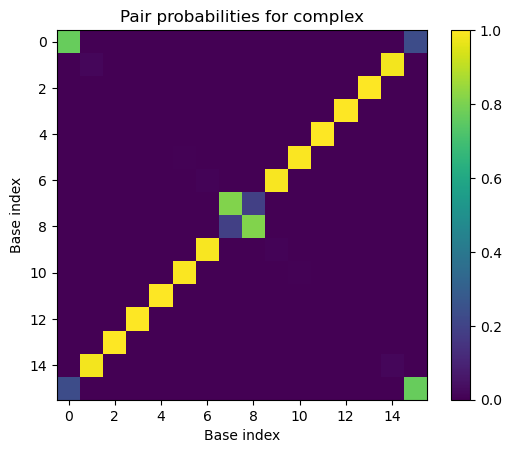

2: TATTCCGC+GCGGAATA


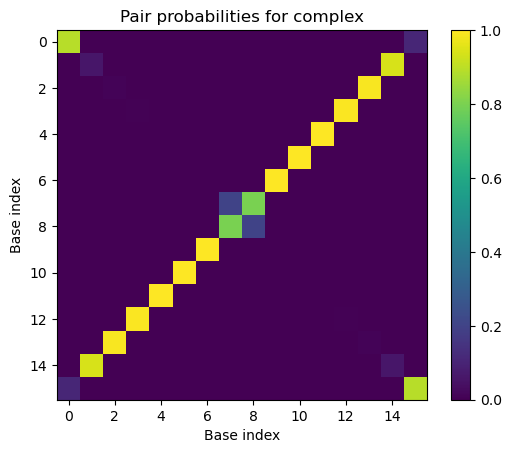

3: TGAGATGC+GCATCTCA


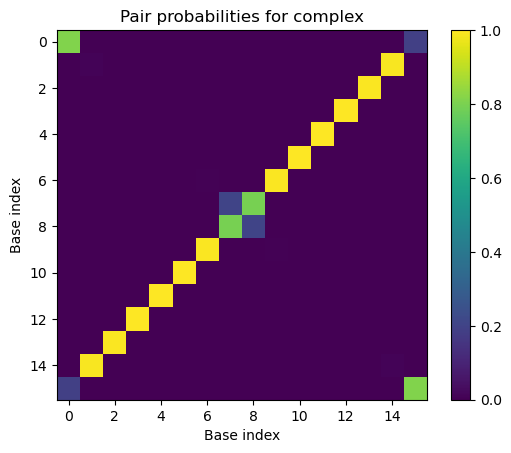

4: AGGTGTCA+AGGTGTCA


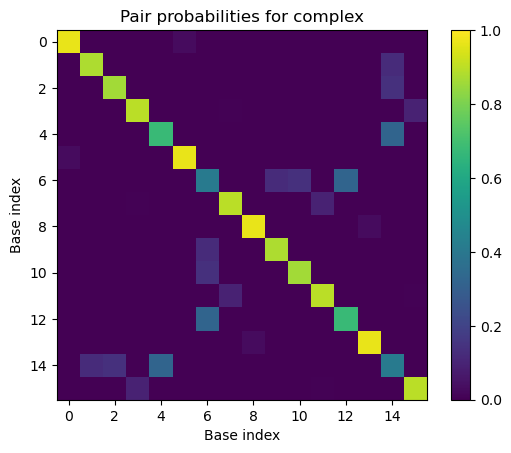

5: AGGTGTCA+TATTCCGC


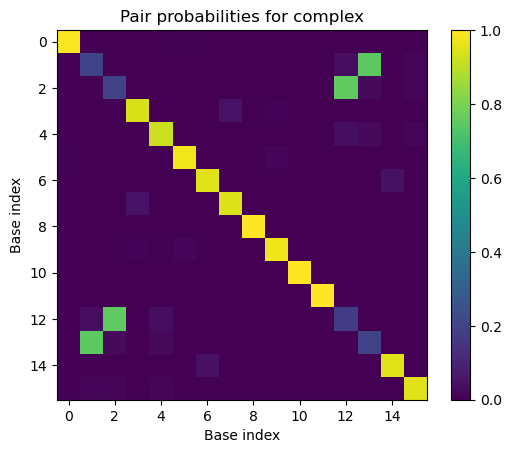

6: AGGTGTCA+GCGGAATA


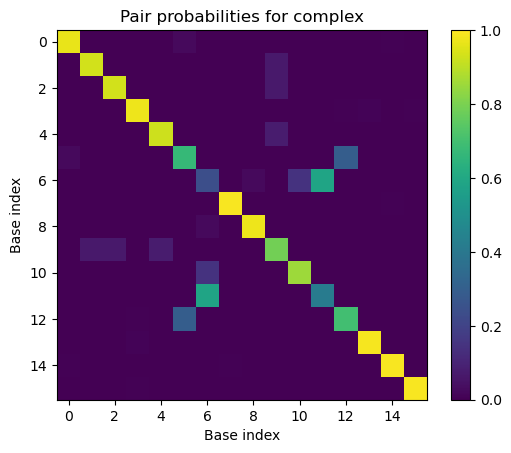

7: AGGTGTCA+TGAGATGC


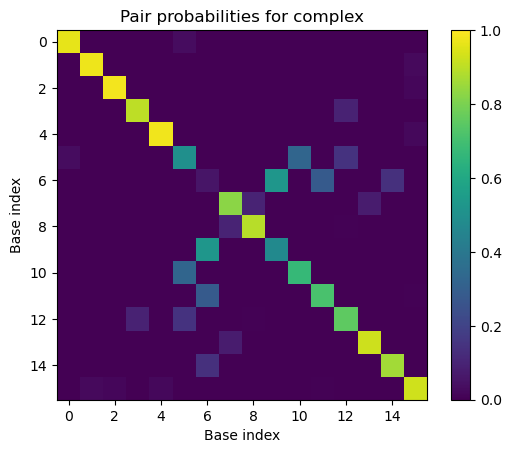

8: AGGTGTCA+GCATCTCA


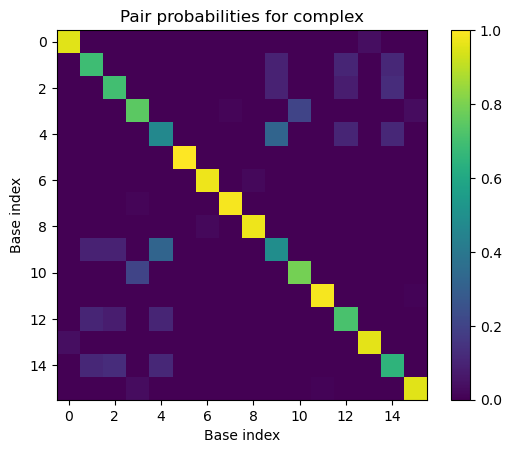

9: TGACACCT+TGACACCT


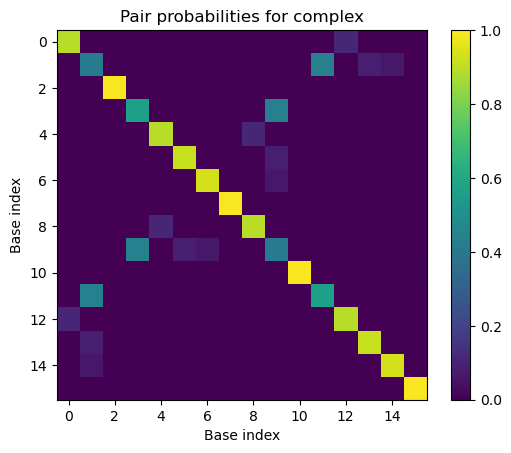

10: TGACACCT+TATTCCGC


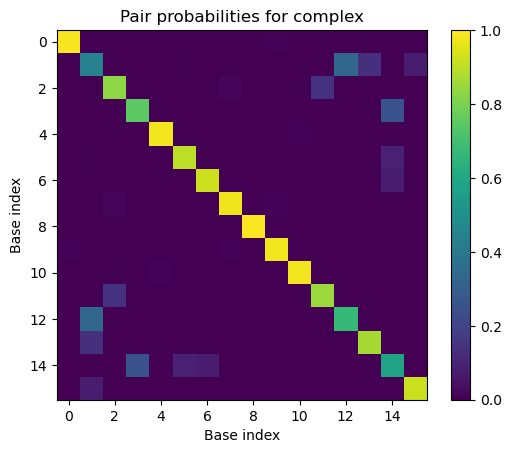

11: TGACACCT+GCGGAATA


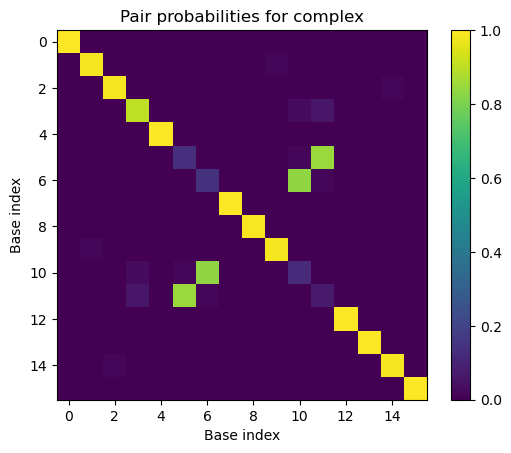

12: TGACACCT+TGAGATGC


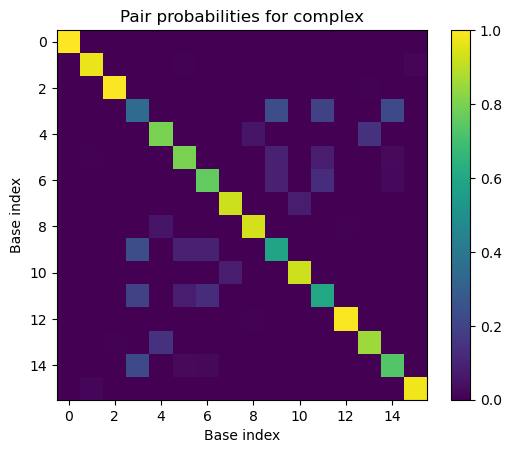

13: TGACACCT+GCATCTCA


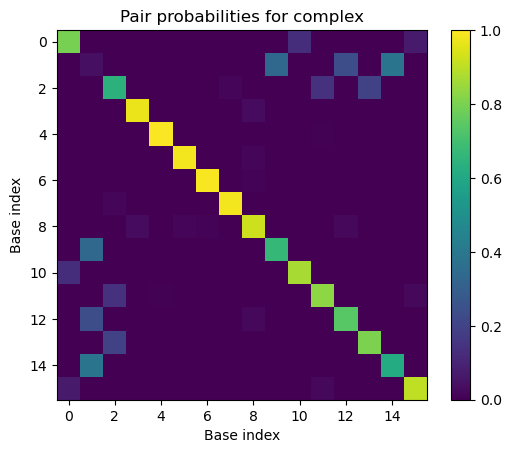

14: TATTCCGC+TATTCCGC


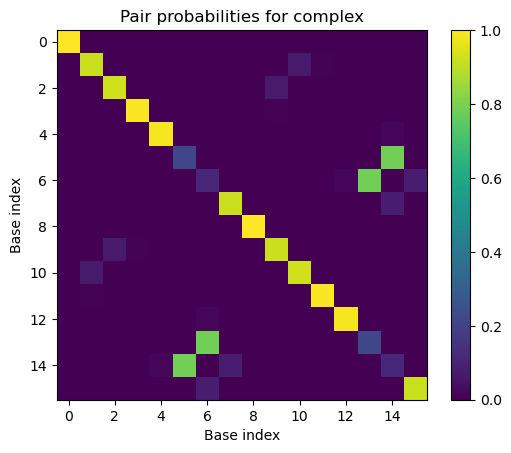

15: TATTCCGC+TGAGATGC


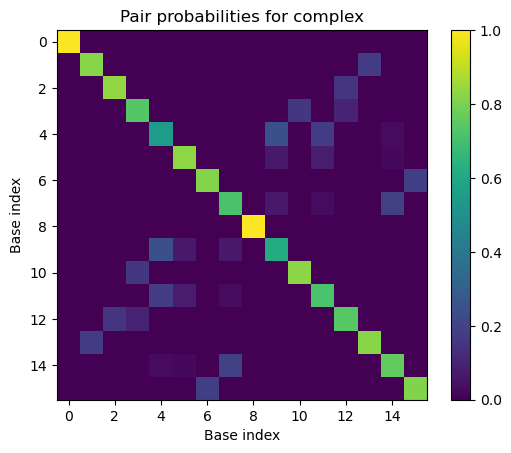

16: TATTCCGC+GCATCTCA


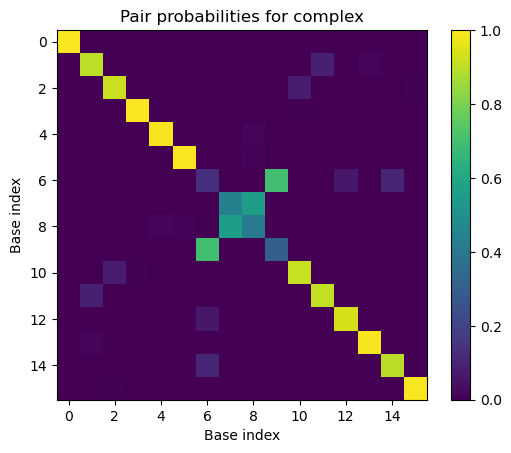

17: GCGGAATA+GCGGAATA


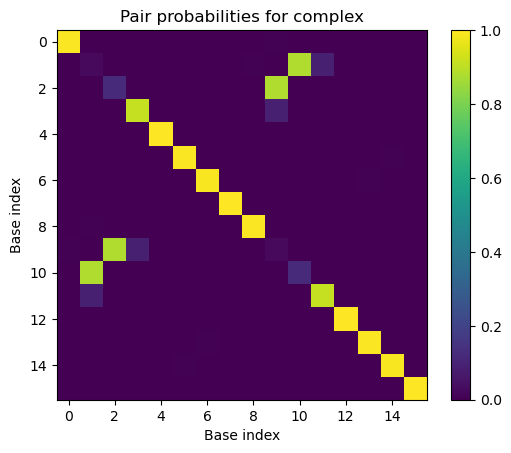

18: GCGGAATA+TGAGATGC


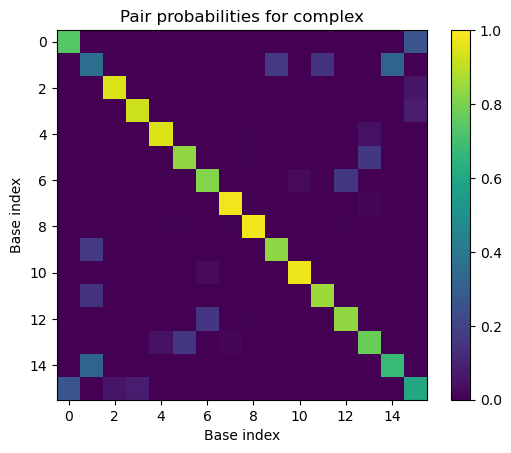

19: GCGGAATA+GCATCTCA


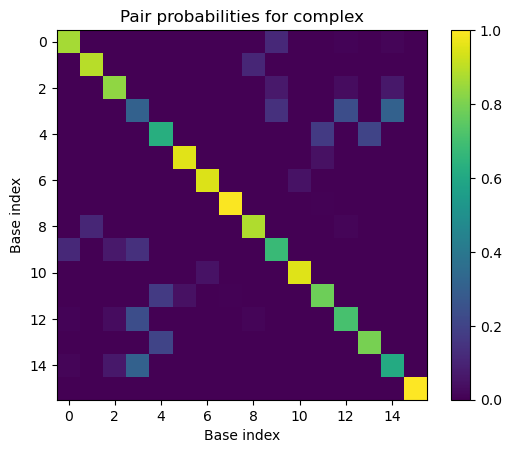

20: TGAGATGC+TGAGATGC


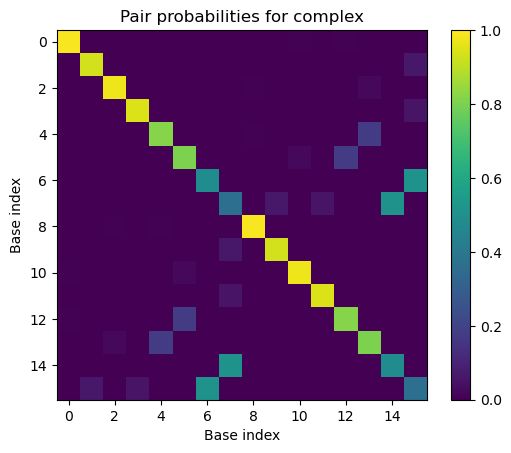

21: GCATCTCA+GCATCTCA


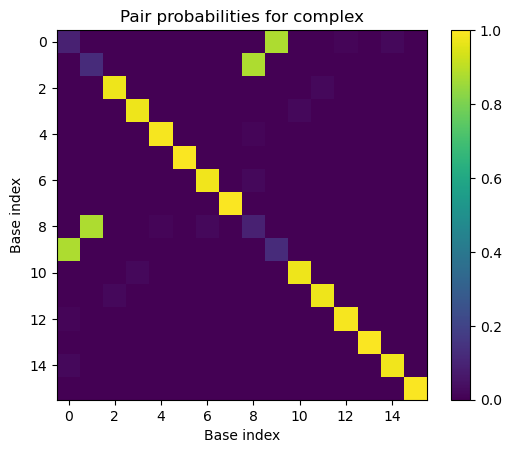

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot the probability matrix
def plot_probability_matrix(probability_matrix):
    plt.imshow(probability_matrix.to_array())
    plt.xlabel('Base index')
    plt.ylabel('Base index')
    plt.title('Pair probabilities for complex')
    plt.colorbar()
    plt.clim(0,1)
    plt.show()

# Compute probability matrix for each pair
for i, p in enumerate(pair, start=1):
    # Print the sequences for the current pair
    print(f"{i}: {p[0]}+{p[1]}")
    # Compute the probability matrix for the current pair
    probability_matrix = pairs(strands=[p[0],p[1]], model=model1)
    
    # Plot the probability matrix
    plot_probability_matrix(probability_matrix)
